# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label)= mnist.load_data()

In [4]:
print(x_train_image.shape)
print(x_test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#指定測試集與訓練資料集的shape (28*28 --> 784)
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
print(x_Train.shape)
print(x_Test.shape)

(60000, 784)
(10000, 784)


In [6]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [7]:
# One Hot Encoding 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)
print(y_Train_OneHot.shape)
print(y_Test_OneHot.shape)

(60000, 10)
(10000, 10)


# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#宣告採用序列模型
model = Sequential()

#建構輸入層: (1) 256 個神經元 (2) 256 個神經元 (3) 64 個神經元 
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))

#建構輸出層: 10 個分類 
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 283,850
Trainable params: 283,850
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [13]:
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 325us/step - loss: 0.2674 - acc: 0.9198 - val_loss: 0.1183 - val_acc: 0.9652
Epoch 2/10
48000/48000 [==============================] - 14s 283us/step - loss: 0.1026 - acc: 0.9684 - val_loss: 0.1067 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 15s 313us/step - loss: 0.0705 - acc: 0.9783 - val_loss: 0.0976 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 17s 352us/step - loss: 0.0538 - acc: 0.9835 - val_loss: 0.0894 - val_acc: 0.9760
Epoch 5/10
48000/48000 [==============================] - 15s 322us/step - loss: 0.0423 - acc: 0.9862 - val_loss: 0.1091 - val_acc: 0.9729
Epoch 6/10
48000/48000 [==============================] - 15s 320us/step - loss: 0.0351 - acc: 0.9884 - val_loss: 0.0972 - val_acc: 0.9742
Epoch 7/10
48000/48000 [==============================] - 16s 329us/

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

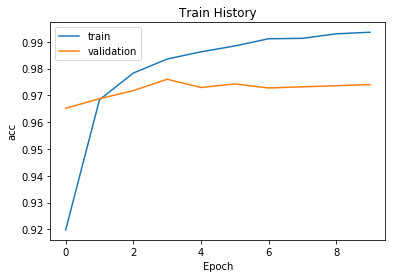

In [15]:
show_train_history(train_history,'acc','val_acc')

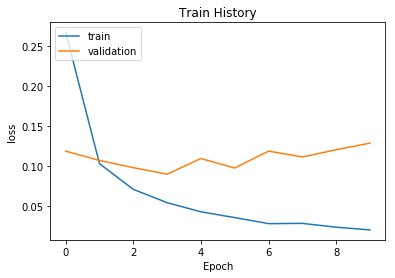

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 74us/step

accuracy= 0.9767
